In [39]:
import csv
from csv import DictReader, DictWriter
from parse_emails import format_counter
from collections import Counter, defaultdict
from train_data_explore import summarise_dicts, read_data


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [80]:
def delabel_data(data):
    lst = list()
    labels = []
    for row in data:
        columns = []
        for k, v in sorted(row.items()):
            if not k == 'is_broken':
                columns.append(v)
            else:
                labels.append(v)
        lst.append(columns)
    return np.matrix(lst), np.array(labels)

In [83]:
data, labels = delabel_data(read_data())

array([ 0.,  1.])

/Users/albin/anaconda/envs/cern-email-parse/lib/python3.6/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


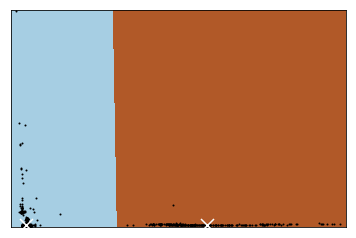

In [110]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('../Report/Graphs/kmeans-PCA-dataset.pdf')

scaled_data = scale(data)
reduced_data = PCA(n_components=2).fit_transform(scaled_data)
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(reduced_data)
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
#plt.title('K-means clustering disk dataset (PCA-reduced data)\n'
#          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
#plt.show()
pp.savefig()
pp.close()
